In [1]:
import tensorflow as tf
import pandas as pd
import lux 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("dataset.csv").fillna("0").sort_values("Disease").reset_index(drop=True)
cat_col = df.select_dtypes("object").columns
df = df[cat_col].astype("category")
df.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Disease     4920 non-null   category
 1   Symptom_1   4920 non-null   category
 2   Symptom_2   4920 non-null   category
 3   Symptom_3   4920 non-null   category
 4   Symptom_4   4920 non-null   category
 5   Symptom_5   4920 non-null   category
 6   Symptom_6   4920 non-null   category
 7   Symptom_7   4920 non-null   category
 8   Symptom_8   4920 non-null   category
 9   Symptom_9   4920 non-null   category
 10  Symptom_10  4920 non-null   category
 11  Symptom_11  4920 non-null   category
 12  Symptom_12  4920 non-null   category
 13  Symptom_13  4920 non-null   category
 14  Symptom_14  4920 non-null   category
 15  Symptom_15  4920 non-null   category
 16  Symptom_16  4920 non-null   category
 17  Symptom_17  4920 non-null   category
dtypes: category(18)
memory usage: 103.9 KB


In [4]:
df[cat_col].nunique().reset_index(name='cardinality')

,index,cardinality
0,Disease,41
1,Symptom_1,34
2,Symptom_2,48
3,Symptom_3,54
4,Symptom_4,51
5,Symptom_5,39
6,Symptom_6,33
7,Symptom_7,27
8,Symptom_8,22
9,Symptom_9,23


In [5]:
data_encoder = LabelEncoder()
sym = pd.read_csv("symptom_severity.csv").Symptom
sym = list(sym) + ["0"]
data_encoder = data_encoder.fit(sym)
len(data_encoder.classes_)

133

In [6]:
for col in cat_col:
    df[col] = df[col].str.replace(" ", "")
#df.to_csv("clean_dataset.csv", index=False)

In [7]:
for col in cat_col[1:]:
    df[col] = data_encoder.transform(df[col])

In [8]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,(vertigo)ParoymsalPositionalVertigo,123,45,72,105,121,0,0,0,0,0,0,0,0,0,0,0,0
1,(vertigo)ParoymsalPositionalVertigo,123,45,72,105,62,121,0,0,0,0,0,0,0,0,0,0,0
2,(vertigo)ParoymsalPositionalVertigo,123,45,72,105,62,0,0,0,0,0,0,0,0,0,0,0,0
3,(vertigo)ParoymsalPositionalVertigo,123,45,72,105,62,121,0,0,0,0,0,0,0,0,0,0,0
4,(vertigo)ParoymsalPositionalVertigo,123,45,72,105,62,121,0,0,0,0,0,0,0,0,0,0,0


In [9]:
training_index = []
for x in df.index:
    if x % 120 == 0 and x != 0:
        for y in np.random.choice(df[x-120:x].index, size=(24)):
            training_index.append(y)
len(training_index)
training_index[0:10]

[29, 92, 88, 17, 5, 89, 12, 46, 37, 107]

In [10]:
training_data = df.drop(training_index)
training_data.tail()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
4915,hepatitisA,57,123,132,29,72,61,1,32,65,131,69,0,0,0,0,0,0
4916,hepatitisA,57,123,132,29,72,61,1,32,65,131,69,0,0,0,0,0,0
4917,hepatitisA,57,123,132,29,72,61,1,32,65,131,69,0,0,0,0,0,0
4918,hepatitisA,57,123,132,29,72,61,1,32,65,131,69,0,0,0,0,0,0
4919,hepatitisA,57,123,132,29,61,1,32,65,131,69,0,0,0,0,0,0,0


In [11]:
test_data = df.iloc[training_index]
test_data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
29,(vertigo)ParoymsalPositionalVertigo,123,45,72,105,62,121,0,0,0,0,0,0,0,0,0,0,0
92,(vertigo)ParoymsalPositionalVertigo,123,45,72,105,62,121,0,0,0,0,0,0,0,0,0,0,0
88,(vertigo)ParoymsalPositionalVertigo,123,45,72,105,62,121,0,0,0,0,0,0,0,0,0,0,0
17,(vertigo)ParoymsalPositionalVertigo,123,45,72,62,121,0,0,0,0,0,0,0,0,0,0,0,0
5,(vertigo)ParoymsalPositionalVertigo,123,45,72,105,62,121,0,0,0,0,0,0,0,0,0,0,0


In [12]:
encoder = LabelEncoder()
encoder = encoder.fit(df.Disease)
encoder.classes_

array(['(vertigo)ParoymsalPositionalVertigo', 'AIDS', 'Acne',
       'Alcoholichepatitis', 'Allergy', 'Arthritis', 'BronchialAsthma',
       'Cervicalspondylosis', 'Chickenpox', 'Chroniccholestasis',
       'CommonCold', 'Dengue', 'Diabetes', 'Dimorphichemmorhoids(piles)',
       'DrugReaction', 'Fungalinfection', 'GERD', 'Gastroenteritis',
       'Heartattack', 'HepatitisB', 'HepatitisC', 'HepatitisD',
       'HepatitisE', 'Hypertension', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis(brainhemorrhage)',
       'Pepticulcerdiseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinarytractinfection', 'Varicoseveins', 'hepatitisA'],
      dtype=object)

In [13]:
train_y = encoder.transform(training_data["Disease"])
train_x = training_data.drop("Disease", axis=1)
train_x.shape

(4058, 17)

In [14]:
test_y = encoder.transform(test_data["Disease"])
test_x = test_data.drop("Disease", axis=1)
test_x.shape

(960, 17)

In [18]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [15]:
#np.reshape(train_x.values, [4059, 1, 17]).view("<f4")
train_x = np.reshape(train_x.values, [train_x.shape[0], 1, train_x.shape[1]])
test_x = np.reshape(test_x.values, [test_x.shape[0], 1, test_x.shape[1]])
print (train_x.shape)
print(test_x.shape)

(4058, 1, 17)
(960, 1, 17)


In [16]:
tf.random.set_seed(99)
model_full_1 = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, input_shape=[1, 17], return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(41, activation="softmax")
])
model_full_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1, 32)             6400      
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               6500      
_________________________________________________________________
dense_3 (Dense)              (None, 41)                4141      
Total params: 41,873
Trainable params: 41,873
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_full_1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 50
history = model_full_1.fit(train_x, train_y, epochs=num_epochs, verbose=2, validation_data=(test_x, test_y))

Epoch 1/50
127/127 - 4s - loss: 3.2098 - accuracy: 0.3603 - val_loss: 2.0080 - val_accuracy: 0.5948
Epoch 2/50
127/127 - 1s - loss: 1.1274 - accuracy: 0.7686 - val_loss: 0.5614 - val_accuracy: 0.8896
Epoch 3/50
127/127 - 1s - loss: 0.4849 - accuracy: 0.8940 - val_loss: 0.2931 - val_accuracy: 0.9333
Epoch 4/50
127/127 - 1s - loss: 0.3135 - accuracy: 0.9211 - val_loss: 0.2035 - val_accuracy: 0.9521
Epoch 5/50
127/127 - 1s - loss: 0.2263 - accuracy: 0.9421 - val_loss: 0.1455 - val_accuracy: 0.9563
Epoch 6/50
127/127 - 1s - loss: 0.1726 - accuracy: 0.9512 - val_loss: 0.1069 - val_accuracy: 0.9740
Epoch 7/50
127/127 - 1s - loss: 0.1415 - accuracy: 0.9566 - val_loss: 0.1141 - val_accuracy: 0.9594
Epoch 8/50
127/127 - 1s - loss: 0.1191 - accuracy: 0.9655 - val_loss: 0.0628 - val_accuracy: 0.9812
Epoch 9/50
127/127 - 1s - loss: 0.0935 - accuracy: 0.9724 - val_loss: 0.0510 - val_accuracy: 0.9927
Epoch 10/50
127/127 - 1s - loss: 0.0774 - accuracy: 0.9795 - val_loss: 0.0427 - val_accuracy: 0.9896

In [18]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model_full_1.evaluate(test_x, test_y)
print("test loss, test acc:", results)

Evaluate on test data
30/30 [==============================] - 0s 3ms/step - loss: 4.4873e-04 - accuracy: 1.0000
test loss, test acc: [0.00044873167644254863, 1.0]


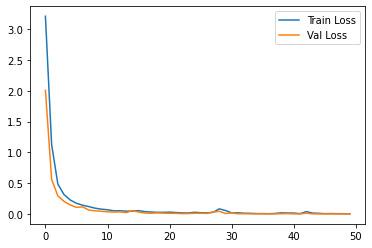

In [19]:
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.show()

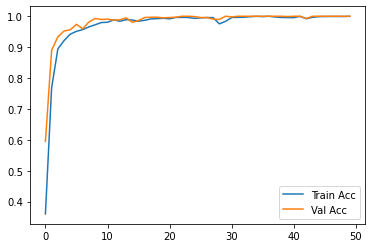

In [20]:
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.show()

In [80]:
model_full_1.save('base_lstm')